In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [2]:
df=pd.read_excel("weight-height.xlsx")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df1=df.copy()
df2=df.copy()

# Encode Dataset

In [5]:
from sklearn.preprocessing import LabelEncoder
lebel = LabelEncoder()

In [6]:
from pandas.core.dtypes.common import is_numeric_dtype

In [7]:
for col in df1.columns:
    if is_numeric_dtype(df1[col]):
        continue
    
    df1[col] = lebel.fit_transform(df1[col])

In [8]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [9]:
dataset=df1

In [10]:
df1 = pd.DataFrame(dataset,columns=['Gender','Height','Weight'])

# Separate dataset

In [11]:
x=df1[['Gender','Height']]
y=df1['Weight']

# Train dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain,xtest, ytrain,ytest=train_test_split(x,y,test_size=.30)

In [14]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [15]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [16]:
xtrain.head()

,Gender,Height
374,1,68.915772
610,1,73.301866
8354,0,64.644288
7082,0,69.534301
3388,1,66.717274


In [17]:
ytrain.head()

374     165.155899
610     199.166929
8354    143.015419
7082    163.796139
3388    183.715815
Name: Weight, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtest.head()

,Gender,Height
1361,1,70.878633
134,1,63.987925
1532,1,66.540789
1079,1,70.973788
680,1,68.608208


# Applying Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [23]:
m = reg.coef_

In [24]:
c = reg.intercept_

In [25]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

In [26]:
reg.predict([[1,64.60]])

array([160.19655276])

In [27]:
df1['predicted results'] = reg.predict(x)

In [28]:
df1.head()

,Gender,Height,Weight,predicted results
0,1,73.847017,241.893563,215.902874
1,1,68.781904,162.310473,185.389379
2,1,74.110105,212.740856,217.487783
3,1,71.730978,220.042470,203.155333
4,1,69.881796,206.349801,192.015399


In [29]:
pred = reg.predict(xtest)

In [30]:
pred

array([198.02059372, 156.50925894, 171.88834852, ..., 145.31964561,
       185.86022426, 214.91157857])

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mse = mean_squared_error(ytest, pred)

In [33]:
mse

100.98607049196019

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mae = mean_absolute_error(ytest, pred)

In [36]:
mae

7.977419984406879

In [210]:
LR_Score=reg.score(xtest,ytest)

In [203]:
LR_Score

0.9039122750404753

# KNN Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor
# Weight function used in prediction = uniform
kn_reg = KNeighborsRegressor(n_neighbors=5)
kn_reg.fit(xtrain, ytrain)
# kn_reg.predict([[1, 73.847017]])
knreg_test_predictions = kn_reg.predict(xtest)

# Weight function used in prediction = distance
kn_distance_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn_distance_reg.fit(xtrain, ytrain)
# kn_reg.predict([[1, 73.847017]])
knreg_distance_test_predictions = kn_distance_reg.predict(xtest)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
kn_reg_mse = mean_squared_error(ytest, knreg_test_predictions)
kn_reg_mse

123.60143591351554

In [39]:
kn_reg_mae = mean_absolute_error(ytest, knreg_test_predictions)
kn_reg_mae

8.820265110553954

In [40]:
kn_reg_distance_mse = mean_squared_error(ytest, knreg_distance_test_predictions)
kn_reg_distance_mse

142.0561604972687

In [137]:
kn_reg_distance_mae = mean_absolute_error(ytest, knreg_distance_test_predictions)
kn_reg_distance_mae

9.488406268616847

In [138]:
KND_Score=kn_distance_reg.score(xtest,ytest)

In [139]:
KND_Score

0.8648342963324397

# Bar Chart for obtained MSE and MAE from this 2 Algorithm

Text(0, 0.5, 'Value')

<Figure size 1440x720 with 0 Axes>

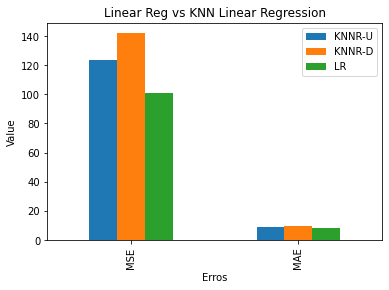

In [42]:
plt.figure(figsize=(20,10))
plotdata = pd.DataFrame({
    "KNNR-U":[kn_reg_mse, kn_reg_mae],
    "KNNR-D":[kn_reg_distance_mse, kn_reg_distance_mae],
    "LR":[mse,mae]
    }, 
    index=["MSE", "MAE"]
)
plotdata.plot(kind="bar")
plt.title("Linear Reg vs KNN Linear Regression")
plt.xlabel("Erros")
plt.ylabel("Value")

# Classification

In [43]:
df2=df.copy()

In [44]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [45]:
col_x_dt_classifier = df2.drop('Gender', axis=1)
col_y_dt_classifier = df2['Gender']
col_x_dt_classifier.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


# Train and Test Dataset for Decision Tree Classifier

In [46]:
xtrain_dt, xtest_dt, ytrain_dt, ytest_dt = train_test_split(col_x_dt_classifier,col_y_dt_classifier,test_size=.30)

# Decision Tree Classifier, Score, Accuracy

[Text(164.53533571417128, 213.25846153846155, 'X[1] <= 161.477\ngini = 0.486\nsamples = 5988\nvalue = [2488, 3500]'),
 Text(74.80147677381106, 204.89538461538461, 'X[1] <= 146.141\ngini = 0.225\nsamples = 2581\nvalue = [2247, 334]'),
 Text(24.237700294834, 196.53230769230768, 'X[1] <= 134.821\ngini = 0.067\nsamples = 1834\nvalue = [1770, 64]'),
 Text(7.381822843225228, 188.16923076923078, 'X[1] <= 68.811\ngini = 0.023\nsamples = 1222\nvalue = [1208, 14]'),
 Text(6.695141648506603, 179.80615384615385, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(8.068504037943853, 179.80615384615385, 'X[1] <= 128.693\ngini = 0.021\nsamples = 1221\nvalue = [1208, 13]'),
 Text(4.463427765671068, 171.44307692307692, 'X[1] <= 112.893\ngini = 0.013\nsamples = 906\nvalue = [900, 6]'),
 Text(3.7767465709524424, 163.07999999999998, 'gini = 0.0\nsamples = 310\nvalue = [310, 0]'),
 Text(5.150108960389694, 163.07999999999998, 'X[1] <= 112.928\ngini = 0.02\nsamples = 596\nvalue = [590, 6]'),
 Text(4.4634277656

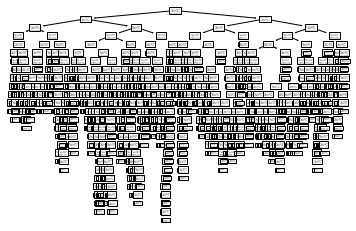

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(xtrain_dt, ytrain_dt)


tree.plot_tree(dt_clf)

In [48]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve
import numpy as np

dtc_predictions = dt_clf.predict(xtest_dt)
dtc_predictions

np.array(dtc_predictions)
classification_report(ytest_dt, dtc_predictions)

'              precision    recall  f1-score   support\n\n      Female       0.85      0.87      0.86      1067\n        Male       0.91      0.89      0.90      1500\n\n    accuracy                           0.88      2567\n   macro avg       0.88      0.88      0.88      2567\nweighted avg       0.88      0.88      0.88      2567\n'

In [49]:
print(classification_report(ytest_dt, dtc_predictions))

              precision    recall  f1-score   support

      Female       0.85      0.87      0.86      1067
        Male       0.91      0.89      0.90      1500

    accuracy                           0.88      2567
   macro avg       0.88      0.88      0.88      2567
weighted avg       0.88      0.88      0.88      2567



In [50]:
confusion_matrix(ytest_dt, dtc_predictions)

array([[ 933,  134],
       [ 163, 1337]], dtype=int64)

In [51]:
tp, fn, fp, tn = confusion_matrix(ytest_dt, dtc_predictions).reshape(-1)

In [52]:
(tp+tn)/(tp+tn+fp+fn)

0.8843007401636152

In [53]:
accuracy_score(ytest_dt, dtc_predictions)

0.8843007401636152

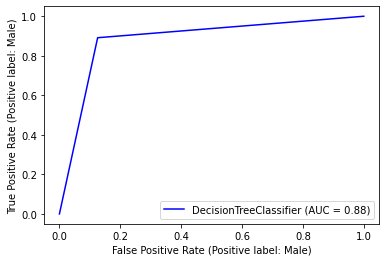

In [54]:
plot_roc_curve(dt_clf, xtest_dt, ytest_dt, color='Blue')

# KNN Classifier, Score, Accuracy

In [55]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=5)

kn_clf.fit(xtrain_dt, ytrain_dt)
knc_predictions = kn_clf.predict(xtest_dt)
knc_predictions

array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [56]:
classification_report(ytest_dt, knc_predictions)

'              precision    recall  f1-score   support\n\n      Female       0.90      0.90      0.90      1067\n        Male       0.93      0.93      0.93      1500\n\n    accuracy                           0.91      2567\n   macro avg       0.91      0.91      0.91      2567\nweighted avg       0.91      0.91      0.91      2567\n'

In [57]:
print(classification_report(ytest_dt, knc_predictions))

              precision    recall  f1-score   support

      Female       0.90      0.90      0.90      1067
        Male       0.93      0.93      0.93      1500

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [58]:
confusion_matrix(ytest_dt, knc_predictions)

array([[ 957,  110],
       [ 112, 1388]], dtype=int64)

In [172]:
kNNC_Score=accuracy_score(ytest_dt, dtc_predictions)

In [173]:
kNNC_Score

0.8843007401636152

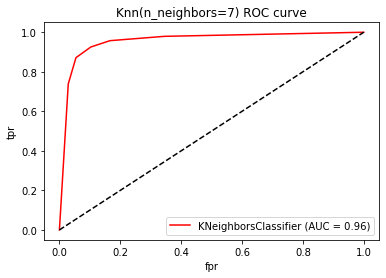

In [60]:
plot_roc_curve(kn_clf, xtest_dt, ytest_dt, color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

# Using Hyper Parameter Tuning

In [61]:
import numpy as np
trees = [int(x) for x in np.linspace(start=15, stop=200, num=25)]

In [62]:
total_tees = np.random.randint(15,200,25)

In [63]:
total_tees

array([ 54, 154,  82, 169,  62,  77, 109,  24, 120, 149,  42, 119,  16,
       104, 173, 190,  22,  76, 184, 104, 197,  96, 177, 140, 196])

In [102]:
n_neighbors=[5,301,801]
weights=['uniform','distance']
algorithm=['auto']
metric=['minkowski']



In [103]:
grids = {
    'n_neighbors':n_neighbors ,
    'weights':weights  ,
    'algorithm':algorithm,
    'metric':metric,

}

In [104]:
print(grids)

{'n_neighbors': [5, 301, 801], 'weights': ['uniform', 'distance'], 'algorithm': ['auto'], 'metric': ['minkowski']}


# Applying Randomized search CV to select best K value for knn regressor

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [211]:
rando_kn_reg = RandomizedSearchCV(estimator = kn_reg, random_state = 42,n_jobs = -1,param_distributions = grids,n_iter = 800, cv=3,verbose = 2)
     

In [212]:
rando_kn_reg

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=800, n_jobs=-1,
                   param_distributions={'algorithm': ['auto'],
                                        'metric': ['minkowski'],
                                        'n_neighbors': [5, 301, 801],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=2)

In [213]:
rando_kn_reg.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=800. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=800, n_jobs=-1,
                   param_distributions={'algorithm': ['auto'],
                                        'metric': ['minkowski'],
                                        'n_neighbors': [5, 301, 801],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=2)

In [214]:
rando_kn_reg.best_params_

{'weights': 'distance',
 'n_neighbors': 301,
 'metric': 'minkowski',
 'algorithm': 'auto'}

In [215]:
rando_kn_reg.cv_results_

{'mean_fit_time': array([0.00601808, 0.00568501, 0.00635147, 0.00568493, 0.00635099,
        0.00568374]),
 'std_fit_time': array([0.00081838, 0.00047401, 0.00047373, 0.00047227, 0.00094561,
        0.00047547]),
 'mean_score_time': array([0.04247546, 0.01839375, 0.08428439, 0.08962878, 0.23076407,
        0.2254111 ]),
 'std_score_time': array([0.00094662, 0.01608088, 0.00245914, 0.00206551, 0.00855114,
        0.01148006]),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[5, 5, 301, 301, 801, 801],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_metric': masked_array(data=['minkowski', 'minkowski', 'minkowski', 'minkowski',
                    'minkowski', 'minkowski'],
          

In [216]:
result = pd.DataFrame(rando_kn_reg.cv_results_)

In [217]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_metric,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006018,0.000818,0.042475,0.000947,uniform,5,minkowski,auto,"{'weights': 'uniform', 'n_neighbors': 5, 'metr...",0.884931,0.875598,0.875109,0.878546,0.004519,3
1,0.005685,0.000474,0.018394,0.016081,distance,5,minkowski,auto,"{'weights': 'distance', 'n_neighbors': 5, 'met...",0.867804,0.851371,0.853245,0.857473,0.007345,5
2,0.006351,0.000474,0.084284,0.002459,uniform,301,minkowski,auto,"{'weights': 'uniform', 'n_neighbors': 301, 'me...",0.877028,0.880218,0.879387,0.878878,0.001351,2
3,0.005685,0.000472,0.089629,0.002066,distance,301,minkowski,auto,"{'weights': 'distance', 'n_neighbors': 301, 'm...",0.882999,0.877272,0.876434,0.878902,0.002917,1
4,0.006351,0.000946,0.230764,0.008551,uniform,801,minkowski,auto,"{'weights': 'uniform', 'n_neighbors': 801, 'me...",0.838779,0.841953,0.838929,0.839887,0.001462,6
5,0.005684,0.000475,0.225411,0.011480,distance,801,minkowski,auto,"{'weights': 'distance', 'n_neighbors': 801, 'm...",0.875875,0.872520,0.871696,0.873364,0.001808,4


In [218]:
rando_kn_reg.best_score_

0.8789020571786499

In [219]:
ran = rando_kn_reg.best_estimator_

In [220]:
ran

KNeighborsRegressor(n_neighbors=301, weights='distance')

In [221]:
ran.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=301, weights='distance')

In [222]:
After_Tuning_Score=ran.score(xtest, ytest)

In [223]:
After_Tuning_Score

0.8885903893642304

In [224]:
knreg_ran_test_predictions = ran.predict(xtest)


In [225]:
knreg_ran_test_predictions

array([195.93267201, 155.07457656, 173.88859459, ..., 142.61826287,
       172.61646064, 218.20983605])

In [226]:
knreg_ran_mse=mean_squared_error(ytest, knreg_ran_test_predictions)

In [227]:
knreg_ran_mse

117.08903294239599

In [228]:
knreg_ran_mae=mean_absolute_error(ytest, knreg_ran_test_predictions)

In [229]:
knreg_ran_mae

8.580660187916761

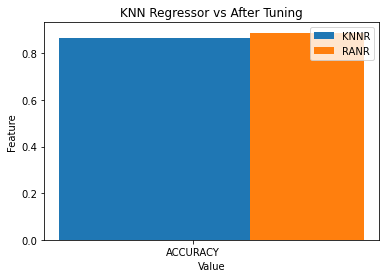

In [233]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ["ACCURACY"]
KNNR_D = [KND_Score]
RAN = [After_Tuning_Score]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, KNNR_D, 0.5, label = 'KNNR')
plt.bar(X_axis + 0.3, RAN, 0.3, label = 'RANR')
  
plt.xticks(X_axis, X)
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("KNN Regressor vs After Tuning")
plt.legend()
plt.show()

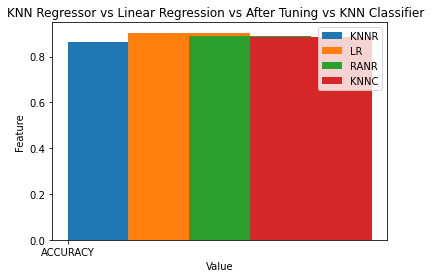

In [234]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ["ACCURACY"]
KNNR_D = [KND_Score]
RAN = [After_Tuning_Score] 
LR=[LR_Score]
KNNC=[kNNC_Score]
X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.1, KNNR_D, 0.2, label = 'KNNR')
plt.bar(X_axis + 0.2, LR, 0.2, label = 'LR') 
plt.bar(X_axis + 0.3, RAN, 0.2, label = 'RANR')
plt.bar(X_axis + 0.4, KNNC, 0.2, label = 'KNNC')
plt.xticks(X_axis, X)
plt.xlabel("Feature")
plt.ylabel("Value")
plt.title("KNN Regressor vs Linear Regression vs After Tuning vs KNN Classifier  ")
plt.legend()
plt.show()